#Assignments:  tinyurl.com/pds-8-task

#Data Cleaning

In [ ]:
import pandas as pd
import numpy as np
# this is uploaded using terminal

In [ ]:
data = {
    "Name": ["Alice", "Bob", "Alice", "Malice", "Charlie", "Bob", None, "Charlie"],
    "Age": ["25", "30", "25", -12, 30, "30", None, -1],
    "Salary": [50000, 60000, 50000, 50000, 7000000, 60000, 45000, 50000],
    "Department": ["HR", "IT", "Finance", "HR", None, "IT", "Finance", "IT"],
    "Country": ["Us", "us", "Uk", "Ban", "uK", "us", "In", "uK"]
}

df = pd.DataFrame(data)

print(df)

      Name   Age   Salary Department Country
0    Alice    25    50000         HR      Us
1      Bob    30    60000         IT      us
2    Alice    25    50000    Finance      Uk
3   Malice   -12    50000         HR     Ban
4  Charlie    30  7000000       None      uK
5      Bob    30    60000         IT      us
6     None  None    45000    Finance      In
7  Charlie    -1    50000         IT      uK


In [ ]:
# 1. Remove Duplicates
df_no_duplicates = df.drop_duplicates()
print("After Removing Duplicates:")
print(df_no_duplicates, "\n")

After Removing Duplicates:
      Name   Age   Salary Department Country
0    Alice    25    50000         HR      Us
1      Bob    30    60000         IT      us
2    Alice    25    50000    Finance      Uk
3   Malice   -12    50000         HR     Ban
4  Charlie    30  7000000       None      uK
6     None  None    45000    Finance      In
7  Charlie    -1    50000         IT      uK 



In [ ]:
# Remove Duplicates based on specific fields

df_no_duplicates = df.drop_duplicates(subset=["Name", "Age"])
print("DataFrame After Dropping Duplicates Based on 'Name' and 'Age':")
print(df_no_duplicates, "\n")

DataFrame After Dropping Duplicates Based on 'Name' and 'Age':
      Name   Age   Salary Department Country
0    Alice    25    50000         HR      Us
1      Bob    30    60000         IT      us
3   Malice   -12    50000         HR     Ban
4  Charlie    30  7000000       None      uK
6     None  None    45000    Finance      In
7  Charlie    -1    50000         IT      uK 



In [ ]:
# 2. Detect and Remove Outliers (Salary > 1,000,000 is considered an outlier)
df_no_outliers = df_no_duplicates[df_no_duplicates["Salary"] < 1000000]
print("After Removing Outliers:")
print(df_no_outliers, "\n")

After Removing Outliers:
      Name   Age  Salary Department Country
0    Alice    25   50000         HR      Us
1      Bob    30   60000         IT      us
3   Malice   -12   50000         HR     Ban
6     None  None   45000    Finance      In
7  Charlie    -1   50000         IT      uK 



In [ ]:
# 3. Remove Irrelevant Data (Removing rows with Department = None)
df_relevant = df_no_outliers.dropna(subset=["Name"])
print("After Removing Irrelevant Data:")
print(df_relevant, "\n")

After Removing Irrelevant Data:
      Name  Age  Salary Department Country
0    Alice   25   50000         HR      Us
1      Bob   30   60000         IT      us
3   Malice  -12   50000         HR     Ban
7  Charlie   -1   50000         IT      uK 



In [ ]:
# 4. Standardize Capitalization (Country names)
df_relevant["Country"] = df_relevant["Country"].str.upper()
print("After Standardizing Capitalization:")
print(df_relevant, "\n")

After Standardizing Capitalization:
      Name  Age  Salary Department Country
0    Alice   25   50000         HR      US
1      Bob   30   60000         IT      US
3   Malice  -12   50000         HR     BAN
7  Charlie   -1   50000         IT      UK 



<ipython-input-12-283de55a1b87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant["Country"] = df_relevant["Country"].str.upper()


In [ ]:
# 5. Convert Data Type (Ensure 'Age' is numeric)
df_relevant["Age"] = pd.to_numeric(df_relevant["Age"], errors="coerce")
print("After Converting Data Type:")
print(df_relevant, "\n")

After Converting Data Type:
      Name  Age  Salary Department Country
0    Alice   25   50000         HR      US
1      Bob   30   60000         IT      US
3   Malice  -12   50000         HR     BAN
7  Charlie   -1   50000         IT      UK 



<ipython-input-13-d613ea937478>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant["Age"] = pd.to_numeric(df_relevant["Age"], errors="coerce")


In [ ]:
# 6. Fixing Structure Errors (e.g., inconsistent column values)
df_relevant["Name"] = df_relevant["Name"].str.title()
print("After Fixing Structural Errors:")
print(df_relevant, "\n")

After Fixing Structural Errors:
      Name  Age  Salary Department Country
0    Alice   25   50000         HR      US
1      Bob   30   60000         IT      US
3   Malice  -12   50000         HR     BAN
7  Charlie   -1   50000         IT      UK 



<ipython-input-14-7aa7900925f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant["Name"] = df_relevant["Name"].str.title()


In [ ]:
# 7. Fix Errors (Replace negative age values with NaN)
df_relevant["Age"] = df_relevant["Age"].apply(lambda x: x if x >= 0 else np.nan)
print("After Fixing Errors:")
print(df_relevant, "\n")

After Fixing Errors:
      Name   Age  Salary Department Country
0    Alice  25.0   50000         HR      US
1      Bob  30.0   60000         IT      US
3   Malice   NaN   50000         HR     BAN
7  Charlie   NaN   50000         IT      UK 



<ipython-input-15-7faba46f0ef8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant["Age"] = df_relevant["Age"].apply(lambda x: x if x >= 0 else np.nan)


In [ ]:
# 8. Language Translation (Translating Country Codes to Full Names)
country_translation = {"US": "United States", "UK": "United Kingdom", "IN": "India"}
df_relevant["Country"] = df_relevant["Country"].map(country_translation)
print("After Language Translation:")
print(df_relevant, "\n")

After Language Translation:
      Name   Age  Salary Department         Country
0    Alice  25.0   50000         HR   United States
1      Bob  30.0   60000         IT   United States
3   Malice   NaN   50000         HR             NaN
7  Charlie   NaN   50000         IT  United Kingdom 



<ipython-input-16-baa08afd9792>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant["Country"] = df_relevant["Country"].map(country_translation)


In [ ]:
# 9. Handle Missing Values (Fill missing Age with mean age)
df_relevant["Age"].fillna(df_relevant["Age"].min(), inplace=True)
print("After Handling Missing Values:")
print(df_relevant, "\n")

After Handling Missing Values:
      Name   Age  Salary Department         Country
0    Alice  25.0   50000         HR   United States
1      Bob  30.0   60000         IT   United States
3   Malice  25.0   50000         HR             NaN
7  Charlie  25.0   50000         IT  United Kingdom 



<ipython-input-17-cdb7ee837fc4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_relevant["Age"].fillna(df_relevant["Age"].min(), inplace=True)
<ipython-input-17-cdb7ee837fc4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant["Age"].fillna(df_relevant["Age"].min(), inplace=True)


###Task

    data = [
    {"ID": 1, "Name": "Alice", "Age": 28, "Salary": 45000},
    {"ID": 2, "Name": "Bob", "Age": 35, "Salary": 55000},
    {"ID": 3, "Name": "Charlie", "Age": 40, "Salary": 60000},
    {"ID": 4, "Name": "Alice", "Age": 28, "Salary": 45000},
    {"ID": 5, "Name": "Frank", "Age": 33, "Salary": 70000},
    {"ID": 6, "Name": "Grace", "Age": None, "Salary": None},
    {"ID": 7, "Name": "InvalidEntry", "Age": 999, "Salary": 1000000}
]


     

|   Tasks  | Tasks |
| -------- | ------- |
| 1. Remove duplicates: |2. Detect and remove outliers:  |
| 3. Remove irrelevant data: |4. Standardize capitalization:     |
| 5. Convert data types:    | 6. Handle missing values:    |

#Sci-Kit Learn

In [ ]:
pip install pandas numpy scikit-learn matplotlib seaborn

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.impute import SimpleImputer

KeyboardInterrupt: 

In [ ]:
# Load Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')

# Display the first few rows of the dataset
print(titanic.head())

In [ ]:
print(titanic.isnull().sum())

In [ ]:
# Drop rows where 'Survived' is missing
titanic = titanic.dropna(subset=['survived'])

# Handle missing data
# Create an imputer for both numerical and categorical columns
numerical_cols = ['age', 'fare']
categorical_cols = ['embarked', 'sex']

# Impute missing values in numerical columns with the median
numerical_imputer = SimpleImputer(strategy='median')
titanic[numerical_cols] = numerical_imputer.fit_transform(titanic[numerical_cols])

# Impute missing values in categorical columns with the mode (most frequent value)
categorical_imputer = SimpleImputer(strategy='most_frequent')
titanic[categorical_cols] = categorical_imputer.fit_transform(titanic[categorical_cols])

# Verify that missing values have been handled
print(titanic.isnull().sum())


In [ ]:
# Encode 'Sex' and 'Embarked' as numerical features
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Display the updated dataset
print(titanic.head())

In [ ]:
# Select features and target
X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = titanic['survived']


In [ ]:
# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the datasets
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the first few rows of scaled data
print(X_train_scaled[:5])

In [ ]:
# USING SVM
# Initialize the SVM classifier (using a linear kernel)
model = SVC(kernel='linear')

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Display the predictions
print(f"Predictions: {y_pred[:5]}")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy using SVC: {accuracy * 100:.2f}%")



In [ ]:
# USING RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)
print(f"Predictions: {y_pred[:5]}")

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy with Random Forest: {accuracy_rf * 100:.2f}%")

In [ ]:
# USING KNN
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors = 7)
model_knn.fit(X_train_scaled, y_train)

y_pred_knn = model_knn.predict(X_test_scaled)
print(f"Predictions: {y_pred_knn[:5]}")

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy with Random Forest: {accuracy_knn * 100:.2f}%")

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {np.mean(cv_scores):.2f}")


#Linear Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
california = fetch_california_housing()
X = california.data
y = california.target

print(X[:1])
print(y[:1])

[[   8.3252       41.            6.98412698    1.02380952  322.
     2.55555556   37.88       -122.23      ]]
[4.526]


In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
print(X_poly[:1])
selector = SelectKBest(f_regression, k=5)
X_selected = selector.fit_transform(X_poly, y)

[[ 1.00000000e+00  8.32520000e+00  4.10000000e+01  6.98412698e+00
   1.02380952e+00  3.22000000e+02  2.55555556e+00  3.78800000e+01
  -1.22230000e+02  6.93089550e+01  3.41333200e+02  5.81442540e+01
   8.52341905e+00  2.68071440e+03  2.12755111e+01  3.15358576e+02
  -1.01758920e+03  1.68100000e+03  2.86349206e+02  4.19761905e+01
   1.32020000e+04  1.04777778e+02  1.55308000e+03 -5.01143000e+03
   4.87780297e+01  7.15041572e+00  2.24888889e+03  1.78483245e+01
   2.64558730e+02 -8.53669841e+02  1.04818594e+00  3.29666667e+02
   2.61640212e+00  3.87819048e+01 -1.25140238e+02  1.03684000e+05
   8.22888889e+02  1.21973600e+04 -3.93580600e+04  6.53086420e+00
   9.68044444e+01 -3.12365556e+02  1.43489440e+03 -4.63007240e+03
   1.49401729e+04]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² (Coefficient of Determination): {r2}")


Mean Squared Error (MSE): 0.5379393117533965
R² (Coefficient of Determination): 0.5894874648405346


In [ ]:
new_data = np.array([[9.3252, 24, 7.98412698, 1.02380952, 245., 2.99556, 31.88  , -121.23]])
new_data_poly = poly.transform(new_data)
new_data_selected = selector.transform(new_data_poly)
new_data_scaled = scaler.transform(new_data_selected)
new_predictions = model.predict(new_data_scaled)
print(f"Predictions for new data: {new_predictions}")


Predictions for new data: [10.21240914]


#Decision Tree & Random Forest


### **Decision Tree**

A **Decision Tree** is a supervised learning algorithm used for classification and regression tasks. It works by splitting the data into subsets based on feature values, forming a tree-like structure where each internal node represents a feature, each branch represents a decision rule, and each leaf node represents an outcome.

#### **How It Works with the Given Dataset:**

1. **Selecting the Best Feature to Split:**
   - The algorithm chooses the feature that provides the highest **information gain (IG)** or lowest **Gini impurity**.
   - **Entropy** measures the impurity in the dataset:
     $$
     Entropy(S) = -\sum_{i=1}^{c} p_i \log_2(p_i)
     $$
     Where:
     - \( S \) is the dataset
     - \( c \) is the number of classes (here, "Yes" or "No" for wearing a coat)
     - \( p_i \) is the proportion of class \( i \) in the dataset

2. **Calculating Information Gain:**
   $$
   IG(S, A) = Entropy(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} Entropy(S_v)
   $$
   Where:
   - \( A \) is the attribute (e.g., Outlook, Temperature, Routine)
   - \( S_v \) is the subset of \( S \) where attribute \( A \) has value \( v \)

3. **Splitting the Dataset:**
   - The feature with the highest IG is selected for the root node.
   - The process repeats recursively on each subset.

#### **Example:**
- The algorithm might first split on **Temperature** because it significantly impacts the decision to wear a coat.
- If **Temperature = Cold**, the tree may further split based on **Routine** (Indoor/Outdoor).
- This continues until pure leaf nodes are reached.

---

### **Random Forest**

A **Random Forest** is an ensemble learning method that builds multiple decision trees and merges their results to improve accuracy and control overfitting.

#### **How It Works:**

1. **Bootstrap Sampling (Bagging):**
   - The algorithm generates multiple subsets of the original dataset by random sampling **with replacement**.

2. **Building Multiple Decision Trees:**
   - Each subset trains a separate decision tree.
   - At each node, the algorithm selects the **best feature** from a random subset of all features (adding randomness).

3. **Voting/Aggregation:**
   - For classification tasks, each tree votes for a class, and the majority vote determines the final output.
   - For regression, the average of outputs is taken.

#### **Mathematical Representation:**
- If there are \( T \) trees in the forest, the final classification output is:
  $$
  \hat{y} = \text{mode}\{h_1(x), h_2(x), \dots, h_T(x)\}
  $$
  Where:
  - \( h_i(x) \) is the prediction of the \( i \)-th decision tree for input \( x \)
  - \( mode \) represents the majority vote

---

$$
\begin{array}{|c|c|c|c|c|}
\hline
\textbf{Day} & \textbf{Outlook} & \textbf{Temperature} & \textbf{Routine} & \textbf{Wear\ Coat?} \\
\hline
D_1 & \text{Sunny}  & \text{Cold}  & \text{Indoor}  & \text{No}  \\
D_2 & \text{Sunny}  & \text{Warm}  & \text{Outdoor} & \text{No}  \\
D_3 & \text{Cloudy} & \text{Warm}  & \text{Indoor}  & \text{No}  \\
D_4 & \text{Sunny}  & \text{Warm}  & \text{Indoor}  & \text{No}  \\
D_5 & \text{Cloudy} & \text{Cold}  & \text{Indoor}  & \text{Yes} \\
D_6 & \text{Cloudy} & \text{Cold}  & \text{Outdoor} & \text{Yes} \\
D_7 & \text{Sunny}  & \text{Cold}  & \text{Outdoor} & \text{Yes} \\
\hline
\end{array}
$$



### **Decision Tree (Using the Dataset)**

The goal is to predict whether to **wear a coat** based on **Outlook**, **Temperature**, and **Routine**.

#### **Step 1: Calculate Entropy of the Entire Dataset**

- Total instances = 7  
- "Yes" = 3 (Days \(D_5, D_6, D_7\))  
- "No" = 4 (Days \(D_1, D_2, D_3, D_4\))  

The entropy of the dataset is:  
$$
Entropy(S) = -\left(\frac{4}{7} \log_2 \frac{4}{7} + \frac{3}{7} \log_2 \frac{3}{7}\right)
$$
Calculating:  
$$
Entropy(S) = -\left(0.571 \log_2(0.571) + 0.429 \log_2(0.429)\right)
= -\left(0.571 \times -0.807 + 0.429 \times -1.222\right)
= 0.985
$$

#### **Step 2: Calculate Information Gain for Each Attribute**

1. **For Temperature (Cold/Warm):**
   - **Cold:** Days \(D_1, D_5, D_6, D_7\) → Yes = 3, No = 1  
     $$
     Entropy_{Cold} = -\left(\frac{3}{4} \log_2 \frac{3}{4} + \frac{1}{4} \log_2 \frac{1}{4}\right) = 0.811
     $$
   - **Warm:** Days \(D_2, D_3, D_4\) → Yes = 0, No = 3  
     $$
     Entropy_{Warm} = -\left(1 \log_2(1) + 0 \log_2(0)\right) = 0
     $$
   - **Information Gain (IG):**  
     $$
     IG(S, Temperature) = 0.985 - \left(\frac{4}{7} \times 0.811 + \frac{3}{7} \times 0\right)
     = 0.985 - 0.463 = 0.522
     $$

2. **For Outlook (Sunny/Cloudy):**
   - **Sunny:** Days \(D_1, D_2, D_4, D_7\) → Yes = 1, No = 3  
     $$
     Entropy_{Sunny} = -\left(\frac{3}{4} \log_2 \frac{3}{4} + \frac{1}{4} \log_2 \frac{1}{4}\right) = 0.811
     $$
   - **Cloudy:** Days \(D_3, D_5, D_6\) → Yes = 2, No = 1  
     $$
     Entropy_{Cloudy} = -\left(\frac{2}{3} \log_2 \frac{2}{3} + \frac{1}{3} \log_2 \frac{1}{3}\right) = 0.918
     $$
   - **Information Gain (IG):**  
     $$
     IG(S, Outlook) = 0.985 - \left(\frac{4}{7} \times 0.811 + \frac{3}{7} \times 0.918\right)
     = 0.985 - 0.857 = 0.128
     $$

3. **For Routine (Indoor/Outdoor):**
   - **Indoor:** Days \(D_1, D_3, D_4, D_5\) → Yes = 1, No = 3  
     $$
     Entropy_{Indoor} = 0.811
     $$
   - **Outdoor:** Days \(D_2, D_6, D_7\) → Yes = 2, No = 1  
     $$
     Entropy_{Outdoor} = 0.918
     $$
   - **Information Gain (IG):**  
     $$
     IG(S, Routine) = 0.985 - \left(\frac{4}{7} \times 0.811 + \frac{3}{7} \times 0.918\right)
     = 0.128
     $$

Let's continue classifying further after splitting by **Temperature** in the decision tree.

- **Root Node:** **Temperature**
  - **If Temperature = Warm:** (Days \(D_2, D_3, D_4\))  
    All outcomes = **No Coat** → Pure node, no further split needed.
  - **If Temperature = Cold:** (Days \(D_1, D_5, D_6, D_7\))  
    Outcomes = Yes (3), No (1) → Requires further splitting.

---

### **Step 3: Splitting Cold Days Further**

**1. Splitting on Outlook:**

- **Sunny:** \(D_1, D_7\) → Yes = 1, No = 1  
  $$
  Entropy_{Sunny} = -\left(\frac{1}{2} \log_2 \frac{1}{2} + \frac{1}{2} \log_2 \frac{1}{2}\right) = 1
  $$
- **Cloudy:** \(D_5, D_6\) → Yes = 2, No = 0 (Pure node)  
  $$
  Entropy_{Cloudy} = 0
  $$
- **Information Gain:**
  $$
  IG = 0.811 - \left(\frac{2}{4} \times 1 + \frac{2}{4} \times 0\right)
  = 0.811 - 0.5 = 0.311
  $$


**2. Splitting on Routine:**
- **Indoor:** \(D_1, D_5\) → Yes = 1, No = 1  
  $$
  Entropy_{Indoor} = 1
  $$
- **Outdoor:** \(D_6, D_7\) → Yes = 2, No = 0 (Pure node)  
  $$
  Entropy_{Outdoor} = 0
  $$
- **Information Gain:**
  $$
  IG = 0.811 - \left(\frac{2}{4} \times 1 + \frac{2}{4} \times 0\right)
  = 0.811 - 0.5 = 0.311
  $$

---

### **Step 4: Final Decision Tree Structure**

Since both **Outlook** and **Routine** provide the same information gain (0.311), we can choose either. Let's choose **Outlook** for simplicity.

```
               Temperature
               /        \
          Cold            Warm
         /                  \
    Outlook               No Coat
   /       \
Sunny     Cloudy
 /   \       \
No   Yes     Yes
```

- **If Temperature = Warm → No Coat (Pure Node)**
- **If Temperature = Cold:**
  - **If Outlook = Cloudy → Yes (Pure Node)**
  - **If Outlook = Sunny:**
    - **If Routine = Indoor → No**
    - **If Routine = Outdoor → Yes**


#### **Step 3: Build the Decision Tree**

Since **Temperature** has the highest IG (0.522), it becomes the **root node**.

- If **Temperature = Warm** → **No Coat** (pure node).
- If **Temperature = Cold**, split based on **Outlook** or **Routine** to classify further.

---

### **Random Forest (Using the Dataset)**

1. **Bootstrap Sampling:**
   - Create multiple subsets of the dataset with random sampling (some data points may repeat).

2. **Building Decision Trees:**
   - Each subset trains a decision tree.
   - Randomly select features (e.g., one tree may consider only **Temperature** and **Outlook**).

3. **Voting for Final Prediction:**
   - For a new day, each tree predicts "Yes" or "No" for wearing a coat.
   - The majority vote is the final decision:
     $$
     \hat{y} = \text{mode}\{h_1(x), h_2(x), \dots, h_T(x)\}
     $$

#### **Key Differences from Decision Tree:**
- **Random Forest** reduces overfitting by averaging multiple trees.
- It handles noisy data better due to feature randomness and bootstrapping.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
data = load_wine()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df.head())

X = data.data
y = data.target

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 1. Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [ ]:
# 2. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluate the models
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [ ]:
# Output the results
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

Decision Tree Accuracy: 94.44%
Random Forest Accuracy: 100.00%


# Naive Bayes

https://colab.research.google.com/drive/1_u6CnH0OaccROieJ9yWDFvYiDYNqzhfa#scrollTo=53166665-e99e-45b7-9cc9-aef28a188b68

# KNN Algorithm

In [ ]:
import numpy as np
from collections import Counter

dataset = np.array([
    [2.5, 3.4, 0],
    [1.3, 2.3, 0],
    [3.1, 4.0, 0],
    [5.4, 2.1, 1],
    [6.2, 3.2, 1],
    [5.8, 4.2, 1],
    [3.5, 5.1, 0],
    [4.5, 3.8, 1],
    [6.1, 2.8, 1],
    [2.0, 3.0, 0]
])

X_train = dataset[:, :-1]
y_train = dataset[:, -1]

def euclidean_distance(point1, point2):
    return np.sqrt(((point1[0] - point2[0]) ** 2) + ((point1[1] - point2[1]) ** 2))

def knn_classify(X_train, y_train, test_point, k):
    distances = []

    for i in range(len(X_train)):
        dist = euclidean_distance(X_train[i], test_point)
        distances.append((dist, y_train[i]))

    distances.sort(key=lambda x: x[0])
    k_nearest_labels = []

    for i in range(k):
      k_nearest_labels.append(distances[i][1])

    most_common = Counter(k_nearest_labels).most_common(1)

    print("most_common", most_common)

    return most_common[0][0]

test_point = np.array([5.3, 2.5])
k = 3
predicted_label = knn_classify(X_train, y_train, test_point, k)

print(f"Predicted class for test point {test_point}: {predicted_label}")

most_common [(1.0, 3)]
Predicted class for test point [5.3 2.5]: 1.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.2f}")

new_sample = np.array([[5.1, 3.5, 1.4, 0.2]])
predicted_class = knn.predict(new_sample)
print(f"Predicted class: {iris.target_names[predicted_class[0]]}")

KNN Accuracy: 1.00
Predicted class: setosa


# K-means clustering

Centroids:  [[8 2]
 [2 3]]


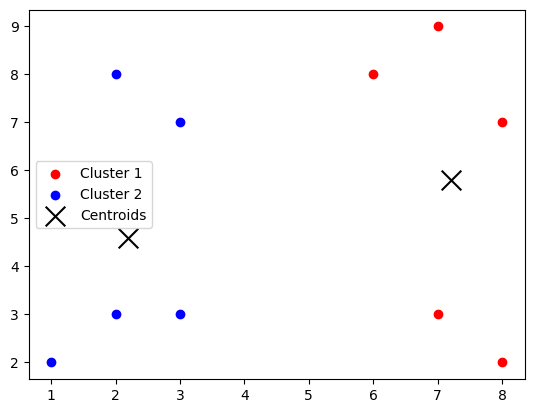

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1, 2], [2, 3], [3, 3], [6, 8], [7, 9], [8, 7],
              [2, 8], [3, 7], [8, 2], [7, 3]])

k = 2

np.random.seed(42)
centroids = X[np.random.choice(len(X), k, replace=False)]
print("Centroids: ", centroids)

def euclidean_distance(point1, point2):
    return np.sqrt(((point1[0] - point2[0]) ** 2) + ((point1[1] - point2[1]) ** 2))

max_iterations = 10

for i in range(max_iterations):
    clusters = [[] for i in range(k)] # [[][]]

    for point in X:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        closest_cluster = np.argmin(distances) #argmin: find the index of the smallest value in the distances array
        clusters[closest_cluster].append(point)

    new_centroids = []
    for i in range(k):
        if len(clusters[i]) > 0:
            new_centroids.append(np.mean(clusters[i], axis=0))  # Mean of points in the cluster
        else:
            new_centroids.append(centroids[i])  # Keep old centroid if cluster is empty

    if np.all(centroids == new_centroids):
        break

    centroids = new_centroids

clusters = [[] for _ in range(k)]
for point in X:
    distances = [euclidean_distance(point, centroid) for centroid in centroids]
    closest_cluster = np.argmin(distances)
    clusters[closest_cluster].append(point)

colors = ['r', 'b']
for i, cluster in enumerate(clusters):
    cluster_points = np.array(cluster)
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='black', label='Centroids')
plt.legend()
plt.show()

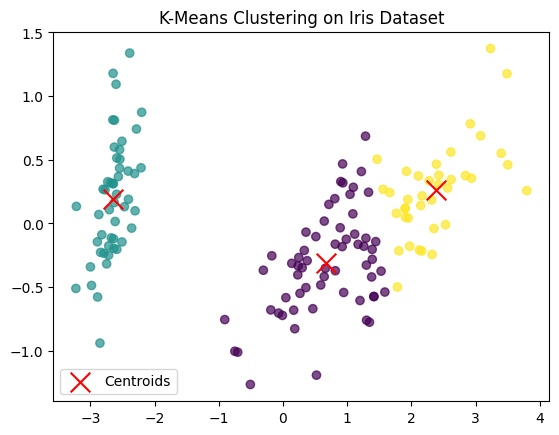

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)
centroids_2d = pca.transform(centroids)

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], marker='x', s=200, c='red', label='Centroids')
plt.title("K-Means Clustering on Iris Dataset")
plt.legend()
plt.show()